In [88]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.datasets import cifar100
from keras.models import Sequential
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [92]:
# applying transformation to image
train_gen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

# test_gen = ImageDataGenerator()
train_gen.fit(x_train)

test_set= train_gen.flow(x_test, y_test, batch_size=256)

In [85]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))

model.add(Conv2D(1024, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, kernel_size=3, kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1024,  kernel_regularizer=l2(0.0005)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_149 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_149 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_93 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_150 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_150 (Bat (None, 32, 32, 64)      

In [100]:
sgd = SGD(
    lr = 0.01, 
    decay = 1e-6, 
    momentum = 0.9, 
    nesterov = True
)

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = sgd,
    metrics = ['accuracy']
)

In [101]:
with tf.device('/device:GPU:0'):
  history = model.fit(
      train_gen.flow(x_train, y_train, batch_size=128),
      epochs = 50,
      verbose = 1,
      validation_data = test_set,
      shuffle = True
  )

Epoch 1/50
391/391 [==============================] - 54s 139ms/step - loss: 3.5513 - accuracy: 0.2211 - val_loss: 3.4877 - val_accuracy: 0.2584
Epoch 2/50
391/391 [==============================] - 50s 129ms/step - loss: 3.4110 - accuracy: 0.2409 - val_loss: 3.0018 - val_accuracy: 0.2726
Epoch 3/50
391/391 [==============================] - 51s 129ms/step - loss: 3.3179 - accuracy: 0.2532 - val_loss: 2.9433 - val_accuracy: 0.2673
Epoch 4/50
391/391 [==============================] - 51s 131ms/step - loss: 3.2251 - accuracy: 0.2731 - val_loss: 3.4635 - val_accuracy: 0.2803
Epoch 5/50
391/391 [==============================] - 51s 131ms/step - loss: 3.1404 - accuracy: 0.2813 - val_loss: 2.9528 - val_accuracy: 0.2702
Epoch 6/50
391/391 [==============================] - 51s 130ms/step - loss: 3.0590 - accuracy: 0.2932 - val_loss: 3.9048 - val_accuracy: 0.3168
Epoch 7/50
391/391 [==============================] - 51s 130ms/step - loss: 2.9749 - accuracy: 0.3065 - val_loss: 3.6175 - val_ac

In [102]:
with tf.device('/device:GPU:0'):
  history = model.fit(
      train_gen.flow(x_train, y_train, batch_size=256),
      epochs = 100,
      verbose = 1,
      validation_data = test_set,
      shuffle = True
  )

Epoch 1/100
196/196 [==============================] - 48s 247ms/step - loss: 1.5551 - accuracy: 0.7482 - val_loss: 2.3346 - val_accuracy: 0.6293
Epoch 2/100
196/196 [==============================] - 47s 239ms/step - loss: 1.4674 - accuracy: 0.7675 - val_loss: 2.0760 - val_accuracy: 0.6103
Epoch 3/100
196/196 [==============================] - 46s 237ms/step - loss: 1.4393 - accuracy: 0.7734 - val_loss: 2.5440 - val_accuracy: 0.6224
Epoch 4/100
196/196 [==============================] - 47s 237ms/step - loss: 1.4124 - accuracy: 0.7764 - val_loss: 2.0448 - val_accuracy: 0.6269
Epoch 5/100
196/196 [==============================] - 47s 238ms/step - loss: 1.3992 - accuracy: 0.7812 - val_loss: 1.7531 - val_accuracy: 0.6103
Epoch 6/100
196/196 [==============================] - 46s 237ms/step - loss: 1.3794 - accuracy: 0.7837 - val_loss: 2.5935 - val_accuracy: 0.6056
Epoch 7/100
196/196 [==============================] - 46s 236ms/step - loss: 1.3624 - accuracy: 0.7874 - val_loss: 1.5309 -

In [104]:
# Final try

with tf.device('/device:GPU:0'):
  history = model.fit(
      train_gen.flow(x_train, y_train, batch_size=256),
      epochs = 10,
      verbose = 1,
      validation_data = test_set,
      shuffle = True
  )

Epoch 1/10
196/196 [==============================] - 48s 244ms/step - loss: 1.9985 - accuracy: 0.8157 - val_loss: 3.4949 - val_accuracy: 0.6553
Epoch 2/10
196/196 [==============================] - 47s 238ms/step - loss: 1.7937 - accuracy: 0.8610 - val_loss: 1.9236 - val_accuracy: 0.6550
Epoch 3/10
196/196 [==============================] - 46s 236ms/step - loss: 1.6896 - accuracy: 0.8787 - val_loss: 3.4178 - val_accuracy: 0.6513
Epoch 4/10
196/196 [==============================] - 46s 236ms/step - loss: 1.6280 - accuracy: 0.8879 - val_loss: 3.6172 - val_accuracy: 0.6525
Epoch 5/10
196/196 [==============================] - 46s 236ms/step - loss: 1.5610 - accuracy: 0.8967 - val_loss: 2.6923 - val_accuracy: 0.6443
Epoch 6/10
196/196 [==============================] - 47s 238ms/step - loss: 1.5033 - accuracy: 0.9037 - val_loss: 3.0128 - val_accuracy: 0.6493
Epoch 7/10
196/196 [==============================] - 47s 238ms/step - loss: 1.4602 - accuracy: 0.9092 - val_loss: 3.0736 - val_ac

In [105]:
# Random try

with tf.device('/device:GPU:0'):
  history = model.fit(
      train_gen.flow(x_train, y_train, batch_size=512),
      epochs = 1,
      verbose = 1,
      validation_data = test_set,
      shuffle = True
  )

Epoch 1/1
98/98 [==============================] - 49s 500ms/step - loss: 1.2764 - accuracy: 0.9360 - val_loss: 2.3632 - val_accuracy: 0.6628


In [106]:
# Random try 2

with tf.device('/device:GPU:0'):
  history = model.fit(
      train_gen.flow(x_train, y_train, batch_size=512),
      epochs = 5,
      verbose = 1,
      validation_data = test_set,
      shuffle = True
  )

Epoch 1/5
98/98 [==============================] - 47s 482ms/step - loss: 1.2199 - accuracy: 0.9491 - val_loss: 1.9964 - val_accuracy: 0.6597
Epoch 2/5
98/98 [==============================] - 45s 456ms/step - loss: 1.1894 - accuracy: 0.9523 - val_loss: 2.0268 - val_accuracy: 0.6657
Epoch 3/5
98/98 [==============================] - 45s 461ms/step - loss: 1.1582 - accuracy: 0.9573 - val_loss: 4.6935 - val_accuracy: 0.6613
Epoch 4/5
98/98 [==============================] - 45s 460ms/step - loss: 1.1382 - accuracy: 0.9583 - val_loss: 3.0705 - val_accuracy: 0.6600
Epoch 5/5
98/98 [==============================] - 45s 455ms/step - loss: 1.1132 - accuracy: 0.9605 - val_loss: 3.2476 - val_accuracy: 0.6652


Test loss: 2.755710290145874 / Test accuracy: 0.660099983215332


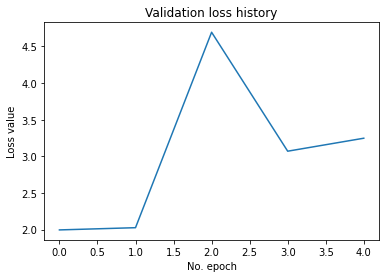

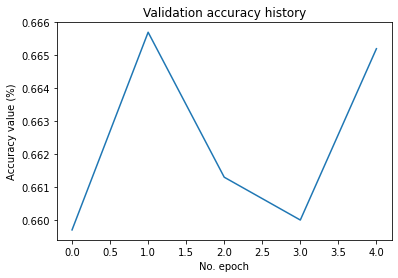

In [107]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [111]:
print("Accuracy: %.2f%%" % (history.history['accuracy'][5 - 1]*100))

Accuracy: 96.05%
